## Exercise 1

In [124]:
import numpy as np
A = np.random.random((10,3))
print(A)
e = 0.5
b = np.argmin(abs(A-e), axis=1)
b += np.arange(0,30,3)
print("---------------------------------------------------------------------")
print(A.flat[b])

[[0.4201348  0.032887   0.67359972]
 [0.13825385 0.96160796 0.03256627]
 [0.34238851 0.13911453 0.77609431]
 [0.6325827  0.13942701 0.94740967]
 [0.85829931 0.69099301 0.33395058]
 [0.25334021 0.59686162 0.99221065]
 [0.78735878 0.35710612 0.3795115 ]
 [0.35950681 0.85015494 0.23136397]
 [0.16331259 0.72938576 0.34461423]
 [0.16517647 0.89036993 0.10914868]]
---------------------------------------------------------------------
[0.4201348  0.13825385 0.34238851 0.6325827  0.33395058 0.59686162
 0.3795115  0.35950681 0.34461423 0.16517647]


## Exercise 2

In [135]:
import numpy as np
A = np.random.random((6,6))
b = np.sum(A, axis=1)
c = np.amin(A, axis=0)
print(b/c)

[19.09964249 24.67767052 20.84574823 43.94441421  6.86820863 14.97605468]


## Exercise 3

In [35]:
import numpy as np
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
mask = x == 0
print(np.amax(x[1:][mask[:-1]]))

5


## Exercise 4

In [42]:
import numpy as np
x = np.ones(10)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
x += np.bincount(i, minlength = 10)
print(x)

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


## Exercise 5

In [157]:
import numpy as np
a = np.arange(16).reshape(4, 4)
d = {i: np.diag(np.flip(a, axis = 1), 3-i).tolist() for i in range(7)}
print(d)

{0: [0], 1: [1, 4], 2: [2, 5, 8], 3: [3, 6, 9, 12], 4: [7, 10, 13], 5: [11, 14], 6: [15]}


## Exercise 6

Clustering completed after 5 iterations


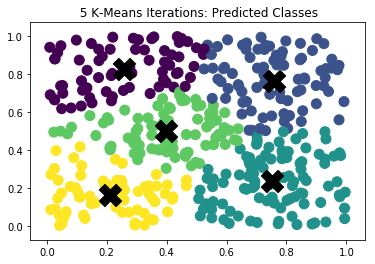

0.00022543875165371416

In [48]:
import numpy as np

#Generating X
X = np.random.rand(400, 2)


#Defining k-means function
def kmeans(X, k, itr, thresh):
    
    centroids = X[:k]
    
    for i in range(itr):
        labels = np.argmin(np.linalg.norm(X - centroids[:, None], axis=2), axis=0)
        
        new_centroids = np.array([X[labels==j, :].mean(axis=0) for j in range(k)])
        
        dist = ((new_centroids - centroids)**2).sum()
        
        if (dist <= thresh) or (new_centroids == centroids).all():
            break
        else:
            centroids = new_centroids
    else:
        raise RuntimeError(f"Clustering algorithm did not complete within {itr} iterations")
    
    print(f"Clustering completed after {i} iterations")
    return(centroids, dist, labels, i)

centroids, dist, labels, i = kmeans(X, 5, 100, 1e-03)       

import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(x=X[:, 0], y=X[:, 1], s=100, c=labels)
plt.scatter(x=centroids[:, 0], y=centroids[:, 1], s=500, c='k', marker='X')
plt.title(f" {i} K-Means Iterations: Predicted Classes")
plt.show()

dist